In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [33]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Preview data.

In [34]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [36]:
cat_cols = train.select_dtypes(include="object").columns
cat_cols

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [37]:
print(train["dependency"].unique())
print(train["edjefe"].unique())
print(train["edjefa"].unique())

['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


<AxesSubplot:xlabel='Target', ylabel='count'>

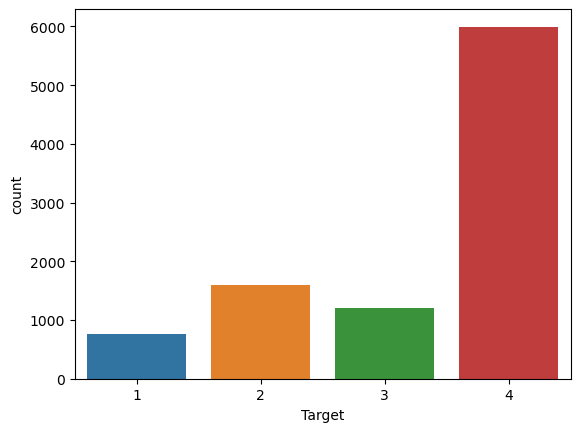

In [38]:
sns.countplot(data=train, x="Target")

<AxesSubplot:xlabel='male', ylabel='count'>

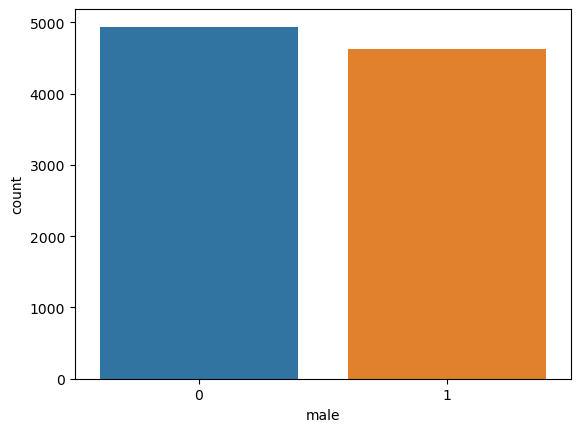

In [39]:
sns.countplot(data=train, x="male")

<AxesSubplot:xlabel='female', ylabel='count'>

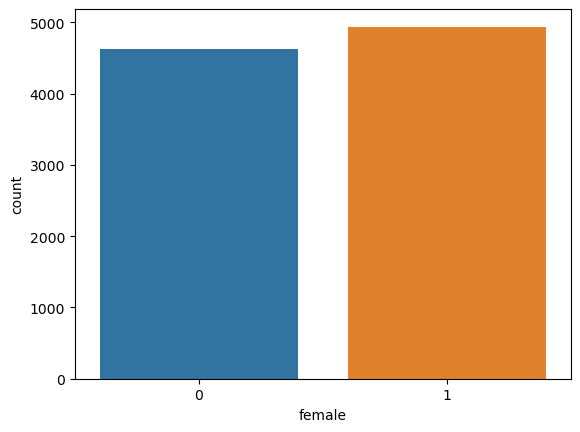

In [40]:
sns.countplot(data=train, x="female")

In [41]:
X = train.drop(columns=["Target"])
y = train["Target"]

# Check whether all members of the house have the same poverty level.

In [42]:
def check_different_poverty_level():
    ids = []
    
    for id in train["idhogar"]:
        # find all household members, and check they have the same poverty
        if train[train["idhogar"] == id]["Target"].nunique() != 1:
            ids.append(id)

    # remove duplicates
    household_number = len(set(ids))
    print(f"there are {household_number} households with different poverty level")


check_different_poverty_level()

there are 85 households with different poverty level


# Check if there is a house without a family head.

In [43]:
household_with_no_head = X.groupby("idhogar")["parentesco1"].sum().loc[lambda x: x == 0]

print(f"there are {household_with_no_head.size} households without a family head")

household_with_no_head

there are 15 households without a family head


idhogar
03c6bdf85    0
09b195e7a    0
1367ab31d    0
1bc617b23    0
374ca5a19    0
61c10e099    0
6b1b2405f    0
896fe6d3e    0
a0812ef17    0
ad687ad89    0
b1f4d89d7    0
bfd5067c2    0
c0c8a5013    0
d363d9183    0
f2bfa75c4    0
Name: parentesco1, dtype: int64

# Set the poverty level of the members and the head of the house same in a family.

In [44]:
merged = pd.merge(train, train[train["parentesco1"] == 1], on="idhogar", how='left')
merged

,Id_x,v2a1_x,hacdor_x,rooms_x,hacapo_x,v14a_x,refrig_x,v18q_x,v18q1_x,r4h1_x,...,SQBescolari_y,SQBage_y,SQBhogar_total_y,SQBedjefe_y,SQBhogar_nin_y,SQBovercrowding_y,SQBdependency_y,SQBmeaned_y,agesq_y,Target_y
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100.0,1849.0,1.0,100.0,0.0,1.000000,0.0000,100.0000,1849.0,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144.0,4489.0,1.0,144.0,0.0,1.000000,64.0000,144.0000,4489.0,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121.0,8464.0,1.0,0.0,0.0,0.250000,64.0000,121.0000,8464.0,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,121.0,1444.0,16.0,121.0,4.0,1.777778,1.0000,121.0000,1444.0,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121.0,1444.0,16.0,121.0,4.0,1.777778,1.0000,121.0000,1444.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81.0,2116.0,25.0,81.0,1.0,1.562500,0.0625,68.0625,2116.0,2.0
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,81.0,2116.0,25.0,81.0,1.0,1.562500,0.0625,68.0625,2116.0,2.0
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,81.0,2116.0,25.0,81.0,1.0,1.562500,0.0625,68.0625,2116.0,2.0
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,81.0,2116.0,25.0,81.0,1.0,1.562500,0.0625,68.0625,2116.0,2.0


In [45]:
train['Target'] = merged['Target_y'].fillna(merged['Target_x'])

check_different_poverty_level()

there are 0 households with different poverty level


# Count how many null values are existing in columns

In [46]:
columns_na = train.columns[train.isna().sum() > 0]
print("columns with null values", columns_na.values)

train[columns_na].isna().sum()

columns with null values ['v2a1' 'v18q1' 'rez_esc' 'meaneduc' 'SQBmeaned']


v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

# Remove null value rows of the target variable

In [47]:
train.dropna(subset=["meaneduc", "SQBmeaned"], inplace=True)

In [48]:
train.drop(columns=["v2a1", "v18q1", "rez_esc"], inplace=True)

# Predict the accuracy using random forest classifier

In [49]:
clf = RandomForestClassifier()

X = train.drop(columns=cat_cols)
y= train['Target']

In [50]:
clf.fit(X, y)

RandomForestClassifier()

# Check the accuracy using a random forest with cross-validation.

In [51]:
clf = RandomForestClassifier()

cross_val_score(clf, X, y, cv=5)

array([0.92621664, 0.91313448, 0.89267016, 0.91361257, 0.93193717])